# Getting started

This notebook will guide you through the basic steps necessary to generate and simulate a simple quantum circuit.


## Writing a quantum circuit

Let us write a circuit preparing a Bell state $(|00\rangle + |11\rangle)/\sqrt{2}$:

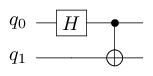

In [1]:
from qat.lang.AQASM import Program, H, CNOT

# Create a Program
qprog = Program()
# Number of qbits
nbqbits = 2
# Allocate some qbits
qbits = qprog.qalloc(nbqbits)

# Apply some quantum Gates
qprog.apply(H, qbits[0]) 
qprog.apply(CNOT, qbits[0], qbits[1])

# Export this program into a quantum circuit
circuit = qprog.to_circ()
# And display it!
circuit.display()

## Simulating the circuit

To simulate our circuit, we use our linear-algebra-based simulator, linalg. We print out the states of the computational basis with a nonzero amplitude (here, we expect to see the state $|00\rangle$ (= index 0) and the state $|11\rangle$ (= index 3), both with amplitude $|1/\sqrt{2}$).

In [2]:
# import one Quantum Processor Unit Factory
from qat.qpus import PyLinalg

# Create a Quantum Processor Unit
pylinalgqpu = PyLinalg()

# Create a job
job = circuit.to_job()

# Submit the job to the QPU
result = pylinalgqpu.submit(job)

# Iterate over the final state vector to get all final components
for sample in result:
    print("State %s amplitude %s" % (sample.state, sample.amplitude))

State |00> amplitude (0.7071067811865475+0j)
State |11> amplitude (0.7071067811865475+0j)


We can also sample the final state of the system to mimic the measure of the final state of a quantum processor. Here, we expect to see state 0 half of the time, and state 3 half of the time (on average).

In [4]:
# Create a job where we specify the number of shots
job = circuit.to_job(nbshots=10)

# Submit to the QPU
result = pylinalgqpu.submit(job)

# And use it to draw 10 samples
for sample in result:
    print("We measured the state {} (its probability is {} and its amplitude {})".format(sample.state, sample.probability, sample.amplitude))

We measured the state |00> (its probability is 0.4 and its amplitude None)
We measured the state |11> (its probability is 0.6 and its amplitude None)


For more information about simulation options, in order to know what you can ask from a simulator, checkout [this tutorial](tutorials/simulation/simulation_overview.ipynb).

In particular, you will learn how to **directly compute the average of an observable** or **return the state vector as a numpy array**.

As for quantum programming, you can learn more about  [here](tutorials/lang/writing_quantum_program.ipynb).
